<h1>Runge-Kutta integrator</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
plt.rc('figure',figsize=(6,2))

<h2>Without args</h2>

In [3]:
def runge_kutta_step(y,y_dot,t,dt):
    a1 = y_dot(y,t)
    a2 = y_dot(y+a1*0.5*dt,t+0.5*dt)
    a3 = y_dot(y+a2*0.5*dt,t+0.5*dt)
    a4 = y_dot(y+a3*dt,t+dt)
    return y + dt/6.*(a1+a4) + dt/3.*(a2+a3)

def runge_kutta(y0,y_dot,ts):
    ys = np.empty((*ts.shape,*y0.shape),dtype=float)
    ys[0] = y0
    dt = ts[1]-ts[0]
    for i in range(len(ts)-1):
        ys[i+1] = runge_kutta_step(ys[i],y_dot,ts[i],dt)
    return ys

def dot(n,time):
    v = vb/(1+rb*n)
    n_dot = 1-n+(0.5*n*v)**2
    return n_dot

In [4]:
time = np.arange(0,50,0.1)

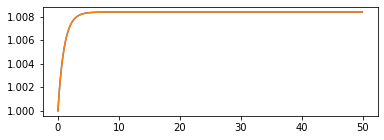

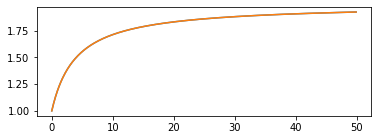

In [5]:
vb = 0.2
rb = 0.1
sol1 = odeint(func=dot,y0=1,t=time)
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot,ts=time)
plt.figure()
plt.plot(time,sol1)
plt.plot(time,sol2.real)

vb = 1
rb = 0
sol1 = odeint(func=dot,y0=1,t=time)
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot,ts=time)
plt.figure()
plt.plot(time,sol1)
plt.plot(time,sol2.real)

## With args

In [6]:
def runge_kutta_step(y,y_dot,t,dt,args):
    a1 = y_dot(y,t,*args)
    a2 = y_dot(y+a1*0.5*dt,t+0.5*dt,*args)
    a3 = y_dot(y+a2*0.5*dt,t+0.5*dt,*args)
    a4 = y_dot(y+a3*dt,t+dt,*args)
    return y + dt/6.*(a1+a4) + dt/3.*(a2+a3)

def runge_kutta(y0,y_dot,ts,args):
    ys = np.empty((*ts.shape,*y0.shape),dtype=float)
    ys[0] = y0
    dt = ts[1]-ts[0]
    for i in range(len(ts)-1):
        ys[i+1] = runge_kutta_step(ys[i],y_dot,ts[i],dt,args)
    return ys

def dot(n,time,vb,rb):
    v = vb/(1+rb*n)
    n_dot = 1-n+(0.5*n*v)**2
    return n_dot

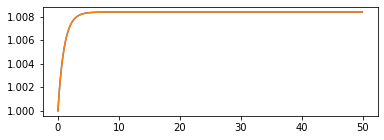

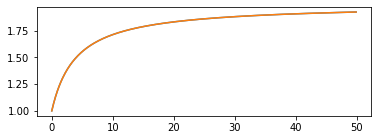

In [7]:
sol1 = odeint(func=dot,y0=1,t=time,args=(0.2,.1))
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot,ts=time,args=(0.2,.1))
plt.figure()
plt.plot(time,sol1)
plt.plot(time,sol2.real)

sol1 = odeint(func=dot,y0=1,t=time,args=(1,0))
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot,ts=time,args=(1,0))
plt.figure()
plt.plot(time,sol1)
plt.plot(time,sol2.real)

## The advantage of having our own solver

In [8]:
def runge_kutta_step(y,y_dot,t,dt,args):
    a1 = y_dot(y,t,*args)
    a2 = y_dot(y+a1*0.5*dt,t+0.5*dt,*args)
    a3 = y_dot(y+a2*0.5*dt,t+0.5*dt,*args)
    a4 = y_dot(y+a3*dt,t+dt,*args)
    return y + dt/6.*(a1+a4) + dt/3.*(a2+a3)

def runge_kutta(y0,y_dot,ts,args):
    ys = np.empty((*ts.shape,*y0.shape),dtype=float)
    ys[0] = y0
    dt = ts[1]-ts[0]
    for i in range(len(ts)-1):
        try:
            ys[i+1] = runge_kutta_step(ys[i],y_dot,ts[i],dt,args)
        except ValueError:
            ys[i+1:] = np.nan
            break
    return ys

In [9]:
def dot_(n,time,vb,rb):
    if time>20: raise ValueError
    v = vb/(1+rb*n)
    n_dot = 1-n+(0.5*n*v)**2
    return n_dot

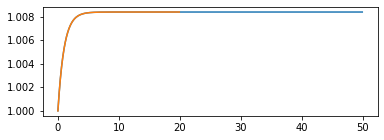

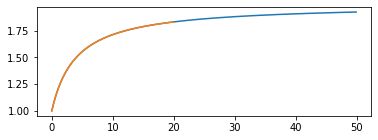

In [10]:
sol1 = odeint(func=dot,y0=1,t=time,args=(0.2,.1))
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot_,ts=time,args=(0.2,.1))
plt.figure()
plt.plot(time,sol1)
plt.plot(time,sol2.real)

sol1 = odeint(func=dot,y0=1,t=time,args=(1,0))
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot_,ts=time,args=(1,0))
plt.figure()
plt.plot(time,sol1)
plt.plot(time,sol2.real)

In [11]:
def dot_(n,time,vb,rb):
    if n>10e4: raise ValueError
    v = vb/(1+rb*n)
    n_dot = 1-n+(0.5*n*v)**2
    return n_dot

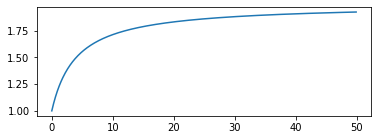

In [12]:
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot_,ts=time,args=(1,0))
plt.figure()
plt.plot(time,sol2.real)

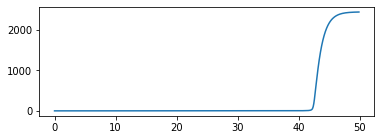

In [13]:
sol2 = runge_kutta(y0=np.array([1]),y_dot=dot_,ts=time,args=(1.03,0.01))
plt.figure()
plt.plot(time,sol2.real)